# What studios tend to make the most profitable movies?
## Explore Top Movies by Production Company<br>

In [1]:
# necessary imports
import os  # for path/directory 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv
from importlib import reload
import helper_functions as hf
%matplotlib inline

In [2]:
# Use helper functions created with Python
reload(hf)

<module 'helper_functions' from '/Users/shirlwilliams/flatiron/Project_Module01/dsc-mod-1-project-v2-1-online-ds-ft-120919/helper_functions.py'>

In [3]:
# Read the tsv files
df=pd.read_csv('zippedData/rt.movie_info.tsv',sep='\t')
df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [4]:
#List unique values in the df['studio'] column
studios = df.studio.unique()
studios

array([nan, 'Entertainment One', 'Warner Bros. Pictures',
       'Paramount Pictures', 'Sony Pictures Classics',
       'Showtime Documentary Films', 'Seventh Art Releasing',
       'ATO Pictures', 'Sony Pictures', 'Universal Pictures', 'MGM',
       'After Dark Films/Freestyle Releasing', 'Lions Gate Films',
       'Regent Releasing', 'Janus Films', 'The Weinstein Company',
       'New Line Cinema', 'Walt Disney Pictures', 'FilmDistrict',
       '20th Century Fox', 'Summit Entertainment', 'Newmarket Film Group',
       'Samuel Goldwyn Films', 'Open Road Films', 'Warner Bros.', 'Fox',
       'Screen Media Films', 'Roadside Attractions',
       'Buena Vista Pictures', 'DreamWorks SKG',
       'Buena Vista Distribution Compa', 'New Yorker Films', 'STXfilms',
       'Destination Films', 'Miramax', 'Paramount Studios',
       'Arrowstorm Entertainment', 'Inception Media Group',
       'Fine Line Features', 'Columbia Pictures', 'IFC Films',
       'Dreamworks Pictures', 'Film District', 'Re

In [5]:
# Use helper functions created with Python
reload(hf)

<module 'helper_functions' from '/Users/shirlwilliams/flatiron/Project_Module01/dsc-mod-1-project-v2-1-online-ds-ft-120919/helper_functions.py'>

In [6]:
# Function to assist when previewing tables
def preview_tables(conn, tables='all'):
    all_tables = hf.get_table_list(conn)
    if tables=='all':
        final_table_names = all_tables
        
    elif type(tables) == list:
        final_table_names = [t for t in all_tables if t in tables]
    
    for table_name in final_table_names:
        print(f"Showing Table: {table_name}")
        query = f"select * from {table_name};"
        df = pd.read_sql(query, conn)
        display(df.head(2))
        print("-"*100)
    print("finished")
    return None

In [7]:
conn = sqlite3.Connection("movies_db.sqlite")

In [8]:
cursor = conn.cursor()

In [9]:
# View table names
table_names = hf.get_table_list(conn)
table_names

['imdb_title_crew',
 'tmdb_movies',
 'imdb_title_akas',
 'imdb_title_ratings',
 'imdb_name_basics',
 'imdb_title_basics',
 'tn_movie_budgets',
 'bom_movie_gross',
 'imdb_title_principals',
 'top_budget_gross_diff_movies']

In [10]:
# Preview all tables
preview_tables(conn, tables='all')

Showing Table: imdb_title_crew


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,None,"nm0175726,nm1802864"


----------------------------------------------------------------------------------------------------
Showing Table: tmdb_movies


,index,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_akas


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_ratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


----------------------------------------------------------------------------------------------------
Showing Table: imdb_name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_basics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


----------------------------------------------------------------------------------------------------
Showing Table: tn_movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


----------------------------------------------------------------------------------------------------
Showing Table: bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


----------------------------------------------------------------------------------------------------
Showing Table: imdb_title_principals


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None


----------------------------------------------------------------------------------------------------
Showing Table: top_budget_gross_diff_movies


,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875


----------------------------------------------------------------------------------------------------
finished


In [11]:
 # Closer look at bom_movie_gross
query = '''SELECT * FROM bom_movie_gross'''

In [12]:
df = pd.read_sql_query(query, conn)
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [13]:
top_budget_gross_diff_movies = pd.read_csv('top_budget_gross_diff_movies.csv')

In [14]:
query = '''SELECT * FROM top_budget_gross_diff_movies'''

In [15]:
pd.read_csv('top_budget_gross_diff_movies.csv').to_sql('top_budget_gross_diff_movies', conn, if_exists='append', index=False)

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:2712: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [16]:
hf.load_table(conn, 'top_budget_gross_diff_movies')

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,budget_gross_diff
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...,...
17341,5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000
17342,5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
17343,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662
17344,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-1400


In [17]:
query = '''SELECT movie, studio, budget_gross_diff AS profit
            FROM top_budget_gross_diff_movies
            JOIN bom_movie_gross
            ON movie = title
            ORDER BY profit DESC
            '''
profit_by_movie_df = pd.read_sql(query, conn)
profit_by_movie_df.head()

,movie,studio,profit
0,Avengers: Infinity War,BV,1748134200
1,Avengers: Infinity War,BV,1748134200
2,Avengers: Infinity War,BV,1748134200
3,Jurassic World,Uni.,1433854864
4,Jurassic World,Uni.,1433854864


In [18]:
profit_by_movie_df = profit_by_movie_df.drop_duplicates()
profit_by_movie_df.head()

,movie,studio,profit
0,Avengers: Infinity War,BV,1748134200
3,Jurassic World,Uni.,1433854864
6,Furious 7,Uni.,1328722794
9,Black Panther,BV,1148258224
12,Jurassic World: Fallen Kingdom,Uni.,1135772799


In [19]:
profit_by_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 3738
Data columns (total 3 columns):
movie     1247 non-null object
studio    1246 non-null object
profit    1247 non-null int64
dtypes: int64(1), object(2)
memory usage: 39.0+ KB


In [20]:
profit_by_movie_df.nunique()

movie     1238
studio      99
profit    1247
dtype: int64

In [21]:
query = '''SELECT studio, AVG(budget_gross_diff) AS avg_profit
                FROM top_budget_gross_diff_movies
                JOIN bom_movie_gross
                ON movie = title
                GROUP BY studio
                ORDER BY avg_profit DESC
                            '''
profit_by_studio_df = pd.read_sql(query, conn)
profit_by_studio_df.head()

,studio,avg_profit
0,P/DW,3.744028e+08
1,BV,3.310447e+08
2,GrtIndia,2.335029e+08
3,Uni.,1.771931e+08
4,Fox,1.730938e+08


In [42]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
profit_by_studio_df['avg_profit'].head()

0   374402760
1   331044694
2   233502914
3   177193062
4   173093758
Name: avg_profit, dtype: float64

In [39]:
profit_by_studio_df.head()

,studio,avg_profit
0,P/DW,374402760
1,BV,331044694
2,GrtIndia,233502914
3,Uni.,177193062
4,Fox,173093758


Text(0.5, 1.0, 'Top 20 Most Profitable Studios')

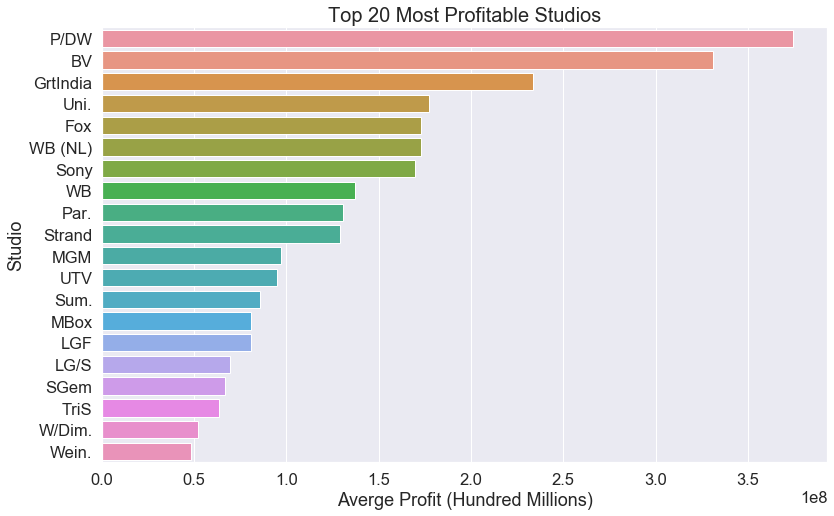

In [40]:
# Bargraph representing the most profitable studios
plt.figure(figsize=(13,8))
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
sns.barplot(x='avg_profit', 
            y='studio', 
            data=profit_by_studio_df[:20])
plt.xlabel('Averge Profit (Hundred Millions)')
plt.ylabel('Studio')
plt.title('Top 20 Most Profitable Studios', fontsize=20)

P/DW is dreamworks, BV is Buena Vista, GrtIndia is Great India Films (US)